Task01

Pearson correlation: PearsonRResult(statistic=-0.42422061672612593, pvalue=6.334424808053703e-88)
Spearman correlation: SignificanceResult(statistic=-0.482169950997556, pvalue=1.2978853095169542e-116)


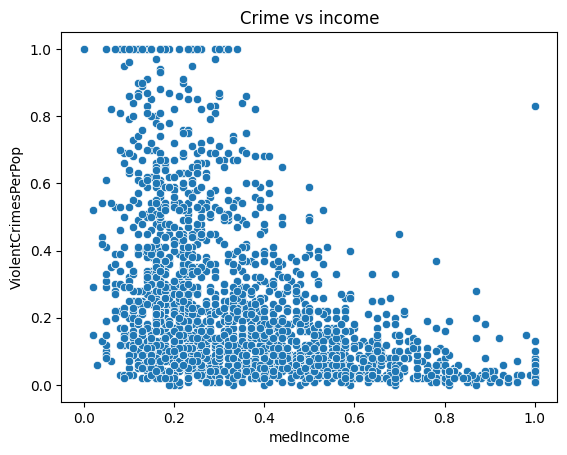

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('censusCrimeClean.csv', header=0)
data = df['medIncome']
data2 = df['ViolentCrimesPerPop']

#Pearson
result = pearsonr(data, data2)
print('Pearson correlation:', result)

#Spearnman
results = spearmanr(data, data2)
print('Spearman correlation:', results)

sns.scatterplot(x='medIncome', y='ViolentCrimesPerPop', data=df,)
plt.title('Crime vs income')
plt.show()

Task02

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

df = pd.read_csv("heart.csv")

df['gender'] = df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['hasHeartDisease'] = df['target'].apply(lambda x: 'Yes' if x == 1 else 'No')
print(df.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  gender hasHeartDisease  
0   0     1       1    Male             Yes  
1   0     2       1    Male             Yes  
2   0     2       1  Female             Yes  
3   0     2       1    Male             Yes  
4   0     2       1  Female             Yes  


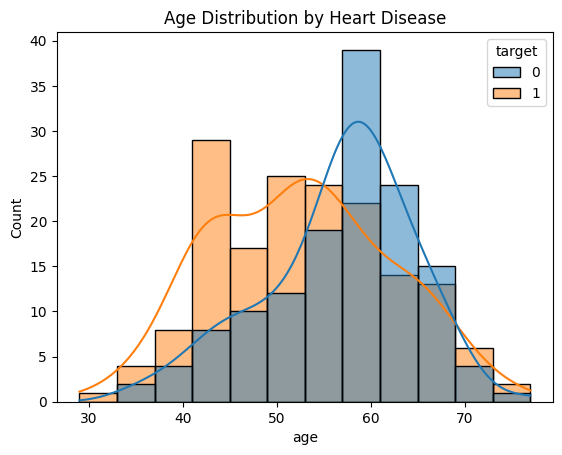

In [8]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.show()


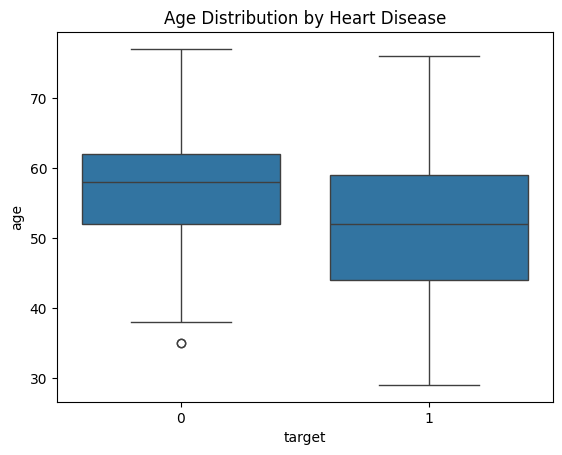

In [9]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()


In [11]:
# Age difference between heart disease groups
t_stat, p_value = ttest_ind(df[df['target'] == 1]['age'], df[df['target'] == 0]['age'])
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -4.014560975148874
P-value: 7.524801303442373e-05
Cohen's d: -0.464614846948058


In [12]:
# Cohen's d calculation
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1), np.std(group2)
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohen_d(df[df['target'] == 1]['age'], df[df['target'] == 0]['age'])
print("Cohen's d:", d)

Cohen's d: -0.464614846948058
